In [6]:
!pip install streamlit


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns


In [9]:
dataset = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
dataset.shape

(614, 13)

In [11]:
dataset.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [12]:
dataset = dataset.dropna()

In [13]:
dataset.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [14]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
dataset.reset_index(inplace = True)

In [16]:
dataset

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
dataset['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [18]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [19]:
dataset['Dependents'] = dataset['Dependents'].replace(to_replace = '3+' , value = 4)

In [20]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='count', ylabel='Education'>

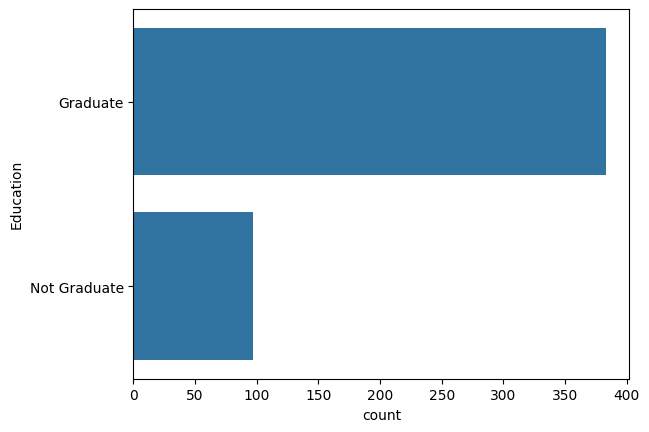

In [21]:
# visualising the Education column
sns.countplot(dataset['Education'])

<Axes: xlabel='Education', ylabel='count'>

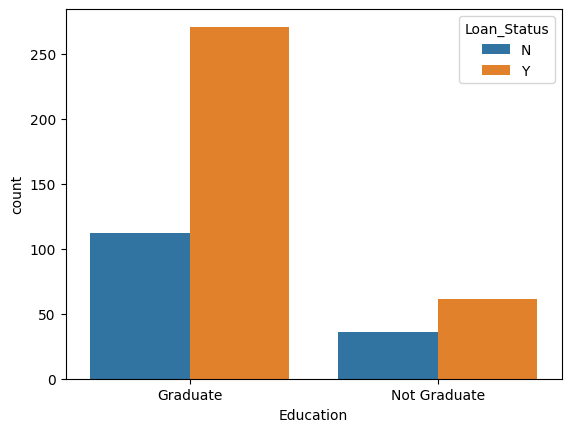

In [22]:
#combining education status with loans
sns.countplot(x= 'Education', hue='Loan_Status', data = dataset)

<Axes: xlabel='Married', ylabel='count'>

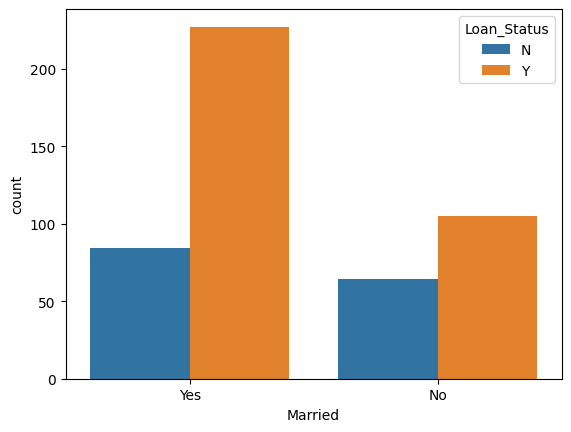

In [23]:
#Married status and loan status
sns.countplot(x= 'Married', hue='Loan_Status', data = dataset)

In [24]:
dataset['Married'].unique()

array(['Yes', 'No'], dtype=object)

#Encoding the categorical values


In [25]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [26]:
dataset.replace({'Married':{'Yes':1,'No':0} , 'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace = True)

<ipython-input-26-bfeaf9c9bf53>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married':{'Yes':1,'No':0} , 'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace = True)


In [27]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
1,2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
2,3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
3,4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
4,5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [28]:
dataset['Dependents'] = dataset['Dependents'].astype('int')

In [29]:
X=dataset.iloc[: , 2:-1].values

In [30]:
X[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.583e+03,
       1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00, 0.000e+00])

In [31]:
dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

<ipython-input-31-0aac0e3e8e03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)


In [32]:
Y=dataset.iloc[: , -1].values

In [33]:
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [34]:
X

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   0.,   2.]])

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
X_train.shape

(360, 11)

In [37]:
X_test.shape

(120, 11)

#Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
log_Y_pred = log_classifier.predict(X_test)

<Axes: >

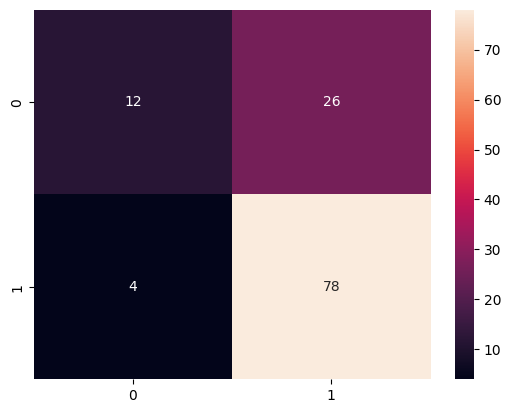

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,log_Y_pred)
cm
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , log_Y_pred)

0.75

KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
k_Y_pred = knn_classifier.predict(X_test)

<Axes: >

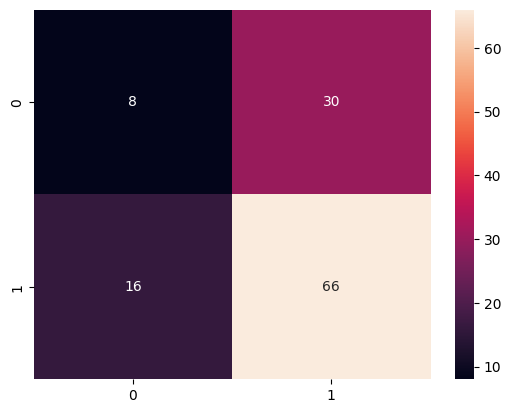

In [44]:
sns.heatmap(confusion_matrix(Y_test,k_Y_pred),annot=True)

In [45]:
accuracy_score(Y_test,k_Y_pred)

0.6166666666666667

Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 25 , criterion = 'entropy')
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [47]:
Y_pred = rf_classifier.predict(X_test)

<Axes: >

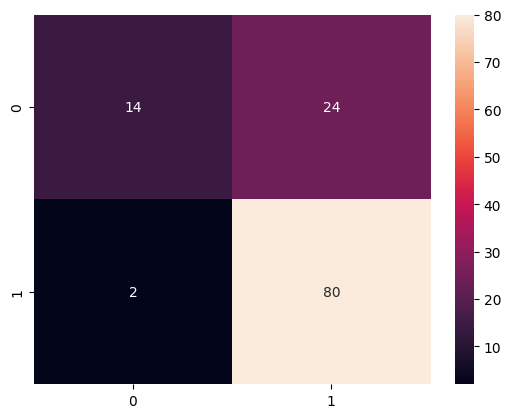

In [48]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [49]:
accuracy_score(Y_test,Y_pred)

0.7833333333333333

SVM

In [50]:
from sklearn.svm import SVC
s_classifier = SVC(kernel= 'rbf',random_state= 42)
s_classifier.fit(X_train,Y_train)

SVC(random_state=42)

In [51]:
s_Y_pred = s_classifier.predict(X_test)

<Axes: >

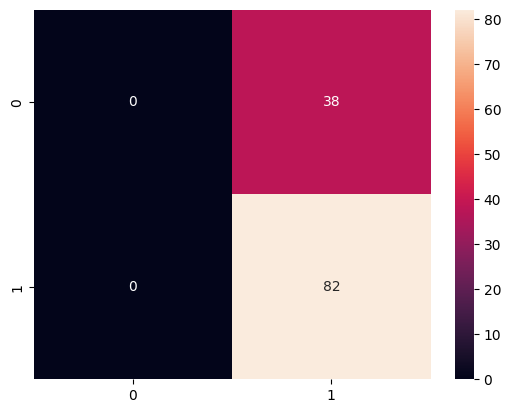

In [52]:
sns.heatmap(confusion_matrix(Y_test,s_Y_pred),annot=True)

In [53]:
accuracy_score(Y_test,s_Y_pred)

0.6833333333333333

XG BOOST

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

xg_classifier = XGBClassifier(n_estimators=25, use_label_encoder=False, eval_metric='logloss')
xg_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=25,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [56]:
Y_pred = xg_classifier.predict(X_test)

<Axes: >

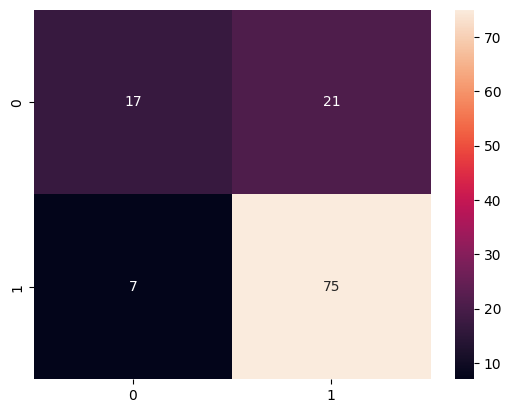

In [57]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [58]:
accuracy_score(Y_test,Y_pred)

0.7666666666666667

NAVIE BAYES

In [59]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [60]:
Y_pred = classifier.predict(X_test)

<Axes: >

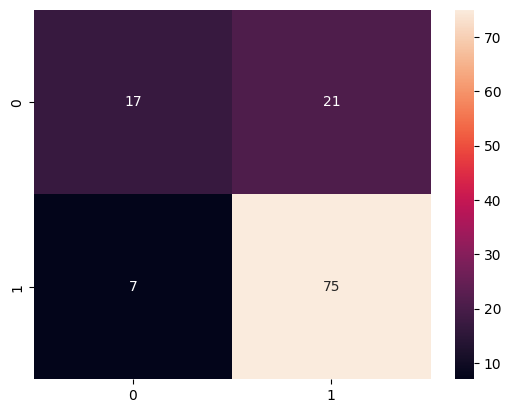

In [61]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [62]:
accuracy_score(Y_test,Y_pred)

0.7666666666666667

In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
up to date, audited 60 packages in 2s
⠸
⠸5 packages are looking for funding
⠸  run `npm fund` for details
⠸
6 vulnerabilities (1 low, 3 moderate, 2 high)

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠼

In [ ]:
!npm audit fix --force

npm warn using --force Recommended protections disabled.
⠙⠹⠸⠼⠴⠦npm warn audit Updating localtunnel to 1.8.3, which is a SemVer major change.
⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏npm warn deprecated cryptiles@2.0.5: This version has been deprecated in accordance with the hapi support policy (hapi.im/support). Please upgrade to the latest version to get the best features, bug fixes, and security patches. If you are unable to upgrade at this time, paid support is available for older versions (hapi.im/commercial).
⠏⠋npm warn deprecated sntp@1.0.9: This module moved to @hapi/sntp. Please make sure to switch over as this distribution is no longer supported and may contain bugs and critical security issues.
⠋npm warn deprecated uuid@3.4.0: Please upgrade  to version 7 or higher.  Older versions may use Math.random() in certain circumstances, which is known to be problematic.  See https://v8.dev/blog/math-random for details.
⠋⠙npm warn deprecated har-valida

In [1]:
! streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.75.75.74
⠙your url is: https://thick-drinks-enjoy.loca.lt


In [65]:
import pickle

# Choose the model you want to save
# For example, if you want to save the Random Forest Classifier:
model = nb_classifier  # 'classifier' was the name you used for the Random Forest model

import pickle

# Choose the model you want to save
# For example, if you want to save the Random Forest Classifier:
model = nb_classifier  # 'classifier' was the name you used for the Random Forest model

# now you can save it to a file
file = 'loan_eligibility_model.pkl'
with open(file, 'wb') as f:
    pickle.dump(nb_classifier, f)

In [66]:
with open(file, 'rb') as f:
  k=pickle.load(f)

In [ ]:
cy = k.predict